In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
population = 55000000
contacts_per_day = 49
chance_infection = 0.09
transmission_coeff = 1 / (contacts_per_day * chance_infection)
print(transmission_coeff)
duration = 250

i0 = 1
r0 = 0
e0 = 0
s0 = population - i0 - r0 - e0

sigma = chance_infection
gamma = 0 #recovery rate
beta = transmission_coeff

0.22675736961451246


In [3]:
def seir(S, E, I, R, N, T, sigma, gamma, beta):
    s = numpy.zeros(T + 1)
    e = numpy.zeros(T + 1)
    i = numpy.zeros(T + 1)
    r = numpy.zeros(T + 1)
    t = numpy.zeros(T + 1)

    for step in range(0, T+1):
         #because in one step the S and E get changed the calculation values change so you get a wrong calculation, so I use a temp value
        _temp_change_in_pop = beta * (S * I / N)
        S -= _temp_change_in_pop
        E += _temp_change_in_pop - sigma * E
        I += sigma * E - gamma * I
        R += gamma * I

        s[step] = S
        i[step] = I
        e[step] = E
        r[step] = R

        t[step] = step

    return s, e, i, r, t

In [4]:
def plot_me(S, E, I, R, times):
    plt.plot(times, S, '-b', label = "Susceptible")
    plt.plot(times, E, '-y', label = "Exposed")
    plt.plot(times, I, '-r', label = "Infected")
    plt.plot(times, R, '-g', label = "Recovered")
    
    plt.xlabel('Time in days')
    plt.ylabel('Population in millions')
    plt.legend()
    plt.show()

### A) Stel een SIR-model op voor jouw situatie. Laat duidelijk zien hoe de constanten zijn afgeleid.

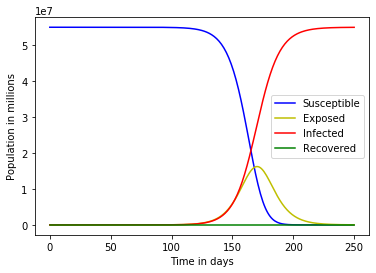

In [5]:
plot_me(*seir(s0,e0,i0,r0,population,duration,sigma,gamma,beta))

### B) Hoeveel mensen moeten gevaccineerd worden om een epidemie te voorkomen?

In [6]:
amount_vaccines = population * ((1 / 5) / transmission_coeff)
amount_vaccines

48510000.00000001

### C) Introduceer een latency van twee dagen in je model en maak plots van het verloop van de ziekte in jouw populatie.

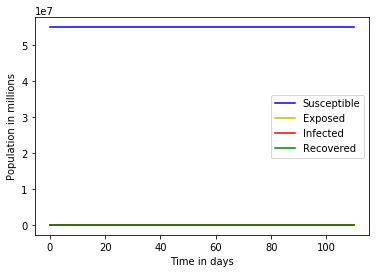

In [9]:
gamma = 0.5
duration = 110
plot_me(*seir(s0,e0,i0,r0,population,duration,sigma,gamma,beta))